In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [4]:
data=pd.read_csv("D:\cognorise\80 cereals\cereal.csv")
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.3,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.0,33.98
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.3,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.70
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.8,34.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.8,39.11
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.0,27.75
74,Wheat Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.7,49.79
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.0,51.59


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     int64  
 8   carbo     77 non-null     int64  
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     int64  
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(2), int64(11), object(3)
memory usage: 9.8+ KB


In [7]:
data.shape

(77, 16)

In [8]:
data.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.3,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.0,33.98
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.3,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.70
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.8,34.38
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,2,11,10,70,25,1,1,0.8,29.51
6,Apple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1.0,33.17
7,Basic 4,G,C,130,3,2,210,2,18,8,100,25,3,1,0.8,37.04
8,Bran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.7,49.12
9,Bran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.7,53.31


In [9]:
data.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber         int64
carbo         int64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight        int64
cups        float64
rating      float64
dtype: object

In [10]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [12]:
data.duplicated().any()

False

In [13]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.181818,14.623377,6.922078,96.077922,28.246753,2.207792,1.025974,0.836364,42.665325
std,19.484119,1.094790,1.006473,83.832295,2.382653,4.261328,4.444885,71.286813,22.342523,0.832524,0.160101,0.228213,14.047301
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,0.300000,18.040000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.700000,33.170000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.800000,40.400000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.830000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,2.000000,1.500000,93.700000


<Axes: title={'center': 'Overall Cereals Data Distribution'}, ylabel='Count'>

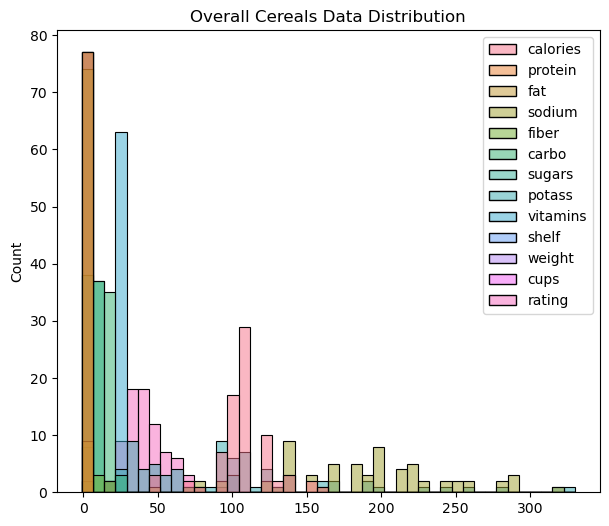

In [15]:
#Lets see the overall distribution of our data
plt.figure(figsize=(7,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data=data)

In [20]:
#Lets create the function so that we don't need to retype everything in each plot
def plot_histogram(column_data,column_name):
    plt.figure(figsize=(5,3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data,kde=True)
    plt.show()
    

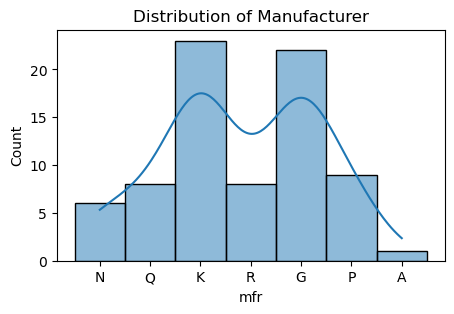

In [21]:
plot_histogram(data['mfr'],'Manufacturer')

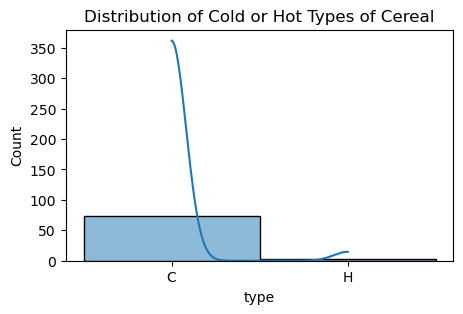

In [24]:
plot_histogram(data['type'],'Cold or Hot Types of Cereal')

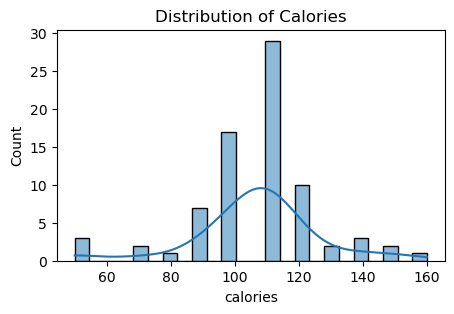

In [26]:
plot_histogram(data['calories'],'Calories')

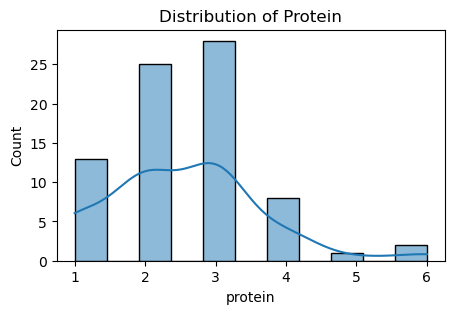

In [28]:
plot_histogram(data['protein'],'Protein')

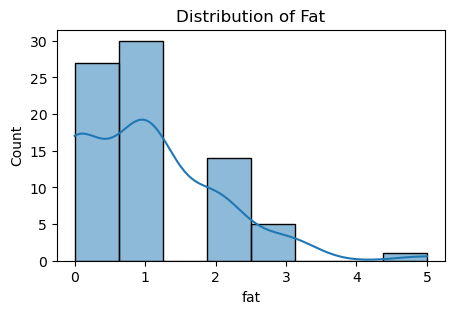

In [29]:
plot_histogram(data['fat'],'Fat')

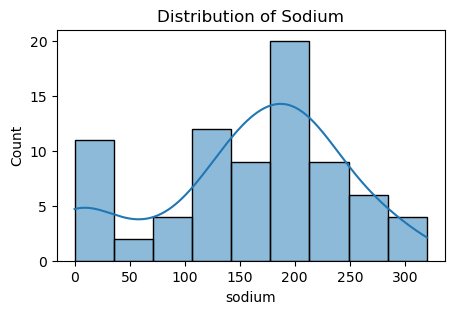

In [30]:
plot_histogram(data['sodium'],'Sodium')

<Axes: title={'center': 'Brand and their Ratings'}, xlabel='name', ylabel='rating'>

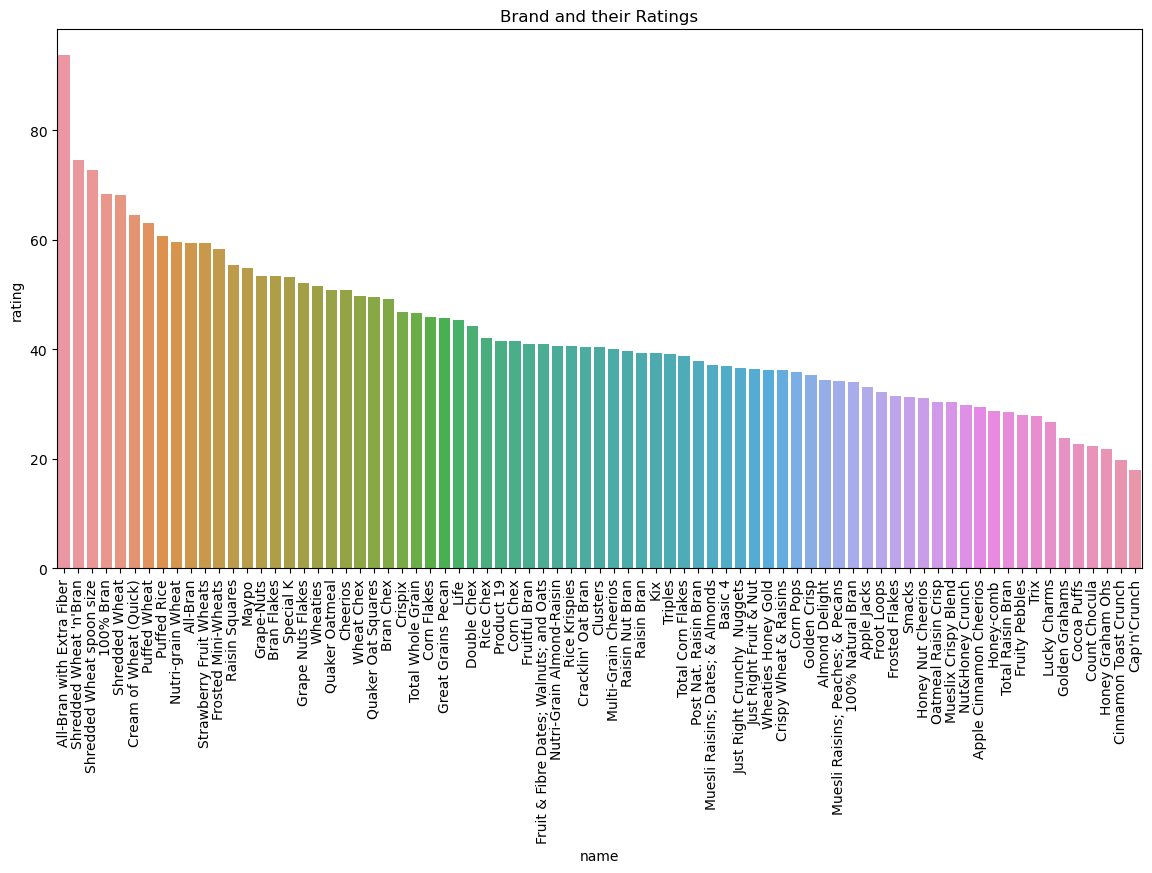

In [32]:
#sort the Data by rating in descending order
cereals_sorted=data.sort_values(by='rating',ascending=False)
plt.figure(figsize=(14,7))
plt.title("Brand and their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted,x=cereals_sorted['name'],y=cereals_sorted['rating'])

<Axes: title={'center': 'Relationship between sugar content and Rating'}, xlabel='sugars', ylabel='rating'>

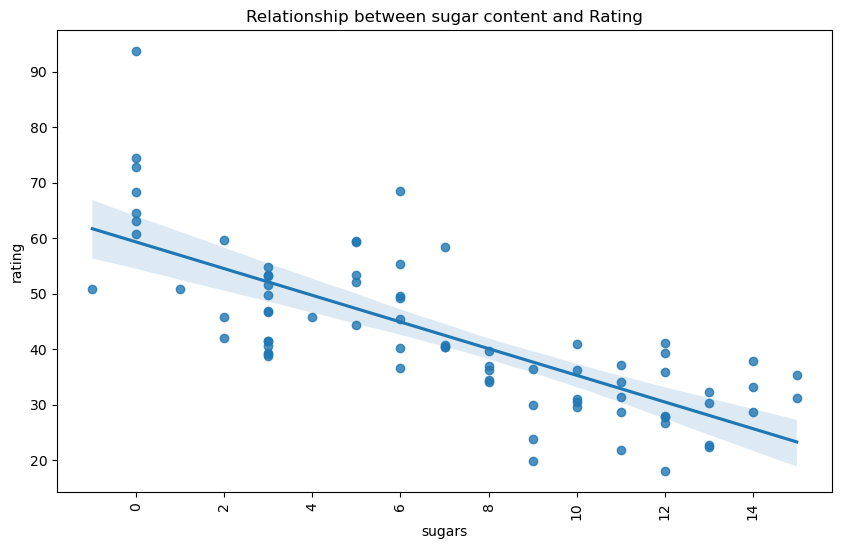

In [36]:
plt.figure(figsize=(10,6))
plt.title('Relationship between sugar content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=data,x=data['sugars'],y=data['rating'])

<Axes: title={'center': 'Relationship between fat content and Rating'}, xlabel='fat', ylabel='rating'>

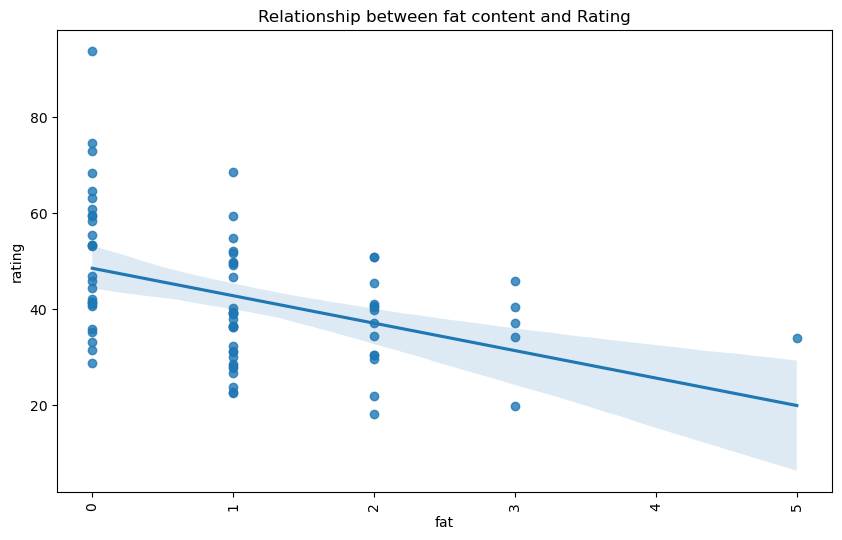

In [37]:
plt.figure(figsize=(10,6))
plt.title('Relationship between fat content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=data,x=data['fat'],y=data['rating'])

D:\Users\mathi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


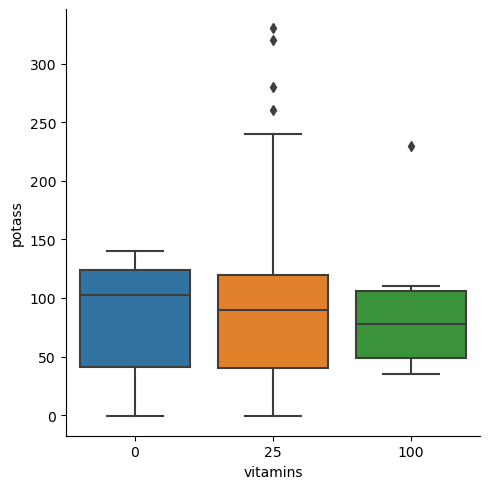

In [38]:
sns.catplot(x='vitamins',y='potass',kind="box",data=data)

In [41]:
#Let's drop non numerical features for our X variable
x=data.drop(columns=['name','type','mfr','rating','shelf','cups','weight'])
y=data['rating']
#fit our model
model=RandomForestRegressor()
model.fit(x,y)
#assign our important features for visualization
feature_importances=model.feature_importances_

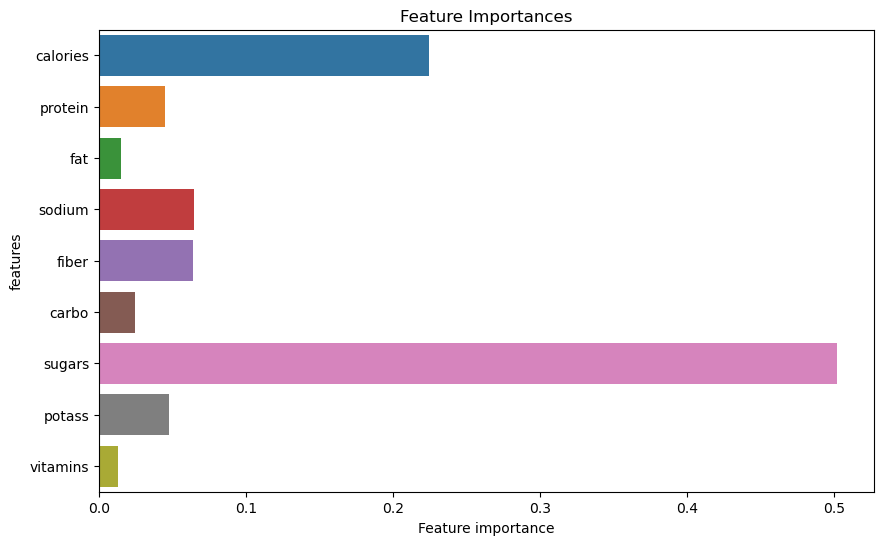

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances,y=x.columns)
plt.xlabel("Feature importance")
plt.ylabel("features")
plt.title("Feature Importances")
plt.show()